### Employer Project: Kite

# Trustpilot Sentiment Analysis

This Jupyter Notebook looks at analysing Trustpilot reviews for Kite. We analysed these Trustpilot reviews to get a better understanding of customer opinions on Kite. More specifically though, we analysed them to uncover insights on Kite's delivery service with third-party couriers thus far. Doing so revealed to us some of the motivations for bringing in more in-house deliveries.

To start our analysis, we first had to collect the Trustpilot reviews for Kite. Once we collected the reviews, we exported them. These were the reviews we used for our analysis. The file that they are stored in is called reviews_data.xlsx which we have included in our GitHub repository. This file is needed for this Jupyter Notebook to run.

# 

## Collecting the Trustpilot Reviews

We carried out our sentiment analysis on Trustpilot reviews for Kite. We used the following code to retrieve these reviews. You will notice that the code is commented out. This is because we don't want it to run. As the reviews on Trustpilot are growing/changing all the time, we want to replicate our analyis with the reviews we actually looked at. The reviews we retrived with this code were exported to a csv file. This file is called review_data, and this is what we used for our sentiment analysis. 

#### *Prepare the Workstation*

In [1]:
# from time import sleep
# import requests
#
# import pandas as pd
# from bs4 import BeautifulSoup
#
# def soup2list(src, list_, attr=None):
#     if attr:
#         for val in src:
#             list_.append(val[attr])
#     else:
#         for val in src:
#             list_.append(val.get_text())
#
# users = []
# userReviewNum = []
# ratings = []
# locations = []
# dates = []
# reviews = []   
#
# from_page = 1
# to_page = 300
# company = 'kitepackaging'
# 
# for i in range(from_page, to_page+1):
#
#    result = requests.get(fr"https://www.trustpilot.com/review/www.kitepackaging.co.uk?page={i}")
#    soup = BeautifulSoup(result.content)
#
#    # Trust Pilot was setup in a way that's not friendly to scraping, so this hacky method will do.
#    soup2list(soup.find_all('span', 
#                            {'class','typography_heading-xxs__QKBS8 typography_appearance-default__AAY17'}), users)
#    soup2list(soup.find_all('div', 
#                            {'class','typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l styles_detailsIcon__Fo_ua'}), 
#              locations)
#    soup2list(soup.find_all('span', 
#                            {'class','typography_body-m__xgxZ_ typography_appearance-subtle__8_H2l'}), 
#              userReviewNum)
#    soup2list(soup.find_all('div', 
#                            {'class','styles_reviewHeader__iU9Px'}), 
#              dates)
#    soup2list(soup.find_all('div', 
#                            {'class','styles_reviewHeader__iU9Px'}), 
#              ratings, attr='data-service-review-rating')
#    soup2list(soup.find_all('div', 
#                            {'class','styles_reviewContent__0Q2Tg'}), 
#              reviews)
#
#    # To avoid throttling
#    sleep(1)
#
# # Create a DataFrame from the extracted data
# review_data = pd.DataFrame({
#     'User': users,
#     'Review Number': userReviewNum,
#     'Rating': ratings,
#     'Location': locations,
#     'Date': dates,
#     'Review': reviews
# })
# 
# # Save the data to a CSV file
# review_data.to_csv('review_data.csv', index=False)

In [2]:
# review_data

Now that we have the Trustpilot reviews, we can start analysis them.

# 

# Sentiment Analysis

# 

### Import Necessary Libraries

In [3]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
 
import seaborn as sns

import nltk 
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import os

! pip install wordcloud
from wordcloud import WordCloud

! pip install textblob
from textblob import TextBlob

from scipy.stats import norm

from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# 

### Load and Inspect the Data

In [57]:
# Load the trust pilot reviews data set into a DataFrame.
reviews = pd.read_csv('review_data.csv') 

# View DataFrame.
reviews.head()

,User,Review Number,Rating,Location,Date,Review
0,Ros Reynolds,4 reviews,1,GB,12 minutes agoVerified,Consistently fails to deliver full…Consistentl...
1,Jasmine Maidment,3 reviews,1,GB,An hour agoVerified,Awful experienceI was sent an email saying my ...
2,Sam N.,3 reviews,4,GB,3 days agoVerified,Quick delivery but packing not protective enou...
3,Zach Rambaldini,1 review,5,GB,3 hours agoVerified,Great delivery and just what we neededGreat de...
4,Daniel Birchall,4 reviews,5,GB,3 days agoVerified,Better than expectedOrdered poster containers ...


#### Explore the data

In [58]:
# Explore data set.
print(reviews.shape)
reviews.info()

(5840, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   User           5838 non-null   object
 1   Review Number  5840 non-null   object
 2   Rating         5840 non-null   int64 
 3   Location       5840 non-null   object
 4   Date           5840 non-null   object
 5   Review         5840 non-null   object
dtypes: int64(1), object(5)
memory usage: 273.9+ KB


In [59]:
# Descriptive statistics.
reviews.describe()

,Rating
count,5840.000000
mean,4.648459
std,0.953202
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [60]:
# Determine if there are any missing values.
reviews.isnull().sum()

User             2
Review Number    0
Rating           0
Location         0
Date             0
Review           0
dtype: int64

#### Look at the distribution of ratings by count

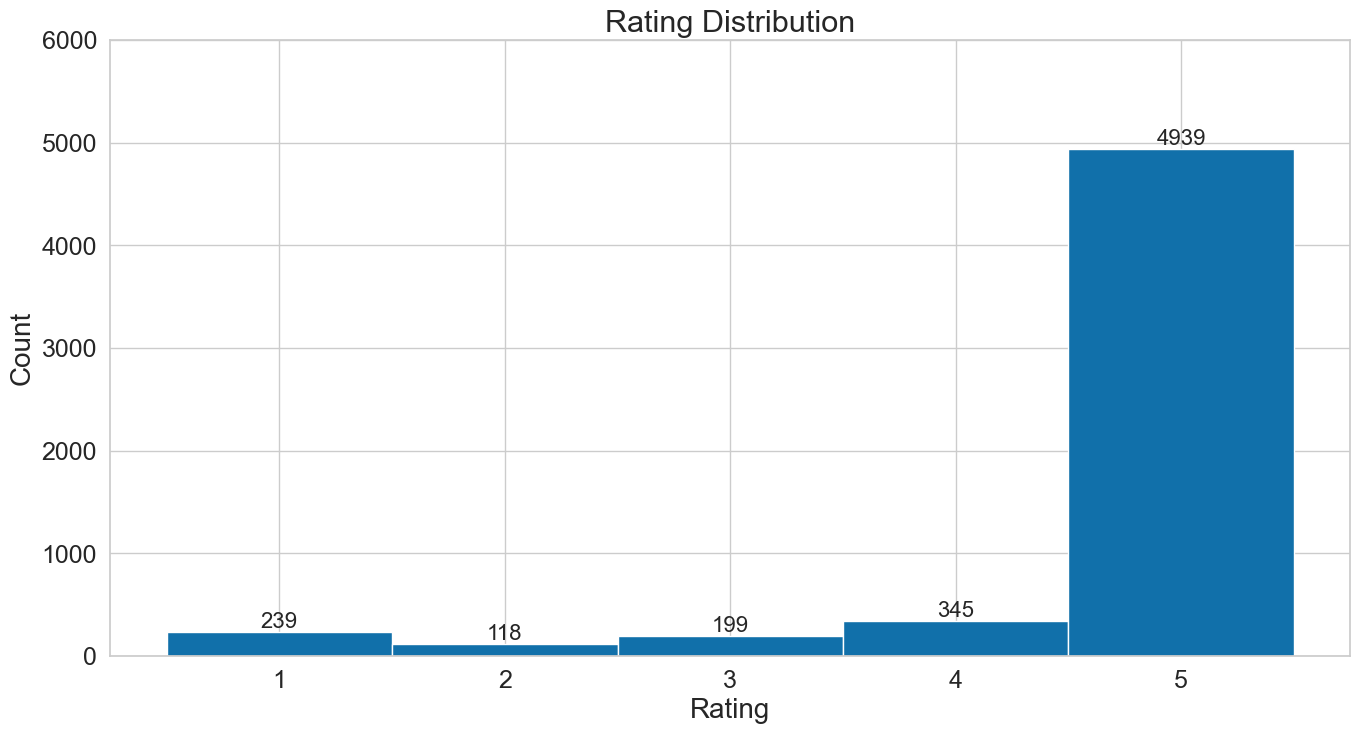

In [61]:
# Set figure size.
sns.set(rc={'figure.figsize':(16, 8)})

# Dark grid, white grid, dark, white, and ticks.
sns.set_style('whitegrid')

# Plot histogram with custom color and adjusted tick marks.
ax = sns.histplot(data=reviews, x='Rating', bins=range(1, 7), 
                  kde=False, alpha=1.0, color="#1170aa")

# Add data labels to the bars.
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., 
                                      p.get_height()), ha='center', 
                va='bottom', fontsize=16)

# Set the y-axis limits.
ax.set_ylim(0, 6000)

# Tick labels, axis labels, and title.
ax.set_xticks([tick - -0.5 for tick in range(1, 6)])
ax.set_xticklabels(range(1, 6), fontsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlabel('Rating', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.title('Rating Distribution', fontsize=22)

# View the output.
plt.show()

Here, we can see that the majority of Trustpilot reviews gave Kite a 5 star rating.

#### Look at the distribution of ratings as a percentage of the total

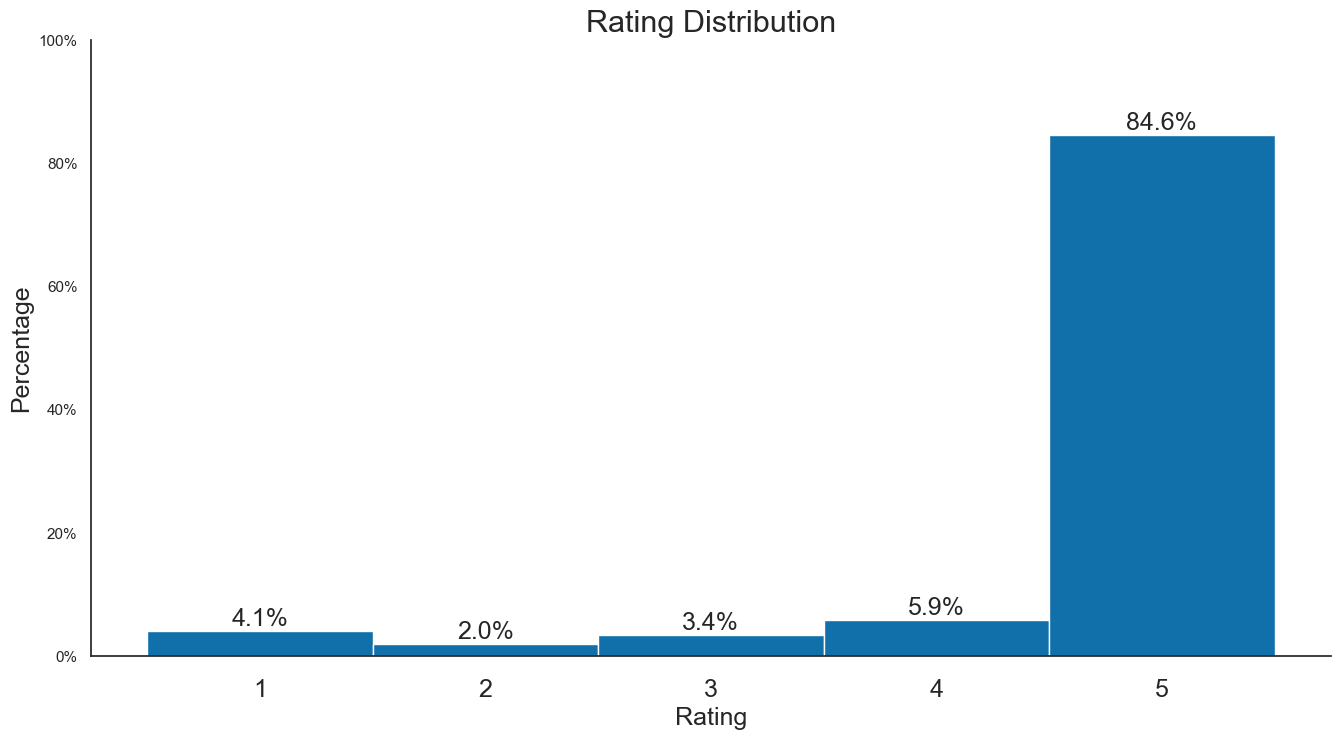

In [62]:
# Calculate the total count.
total_count = len(reviews)

# Set the style to remove gridlines.
sns.set_style('white')

# Plot histogram with custom color and adjusted tick marks.
ax = sns.histplot(data=reviews, x='Rating', bins=range(1, 7),
                  kde=False, alpha=1.0, color="#1170aa")

# Add data labels to the bars with percentage values.
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=18)

# Set the y-axis limits.
ax.set_ylim(0, total_count)

# Remove the gridlines.
ax.grid(False)

# Set the y-axis tick locations at every 20%.
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(total_count * 0.2))

# Set the y-axis tick labels as percentages.
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(xmax=total_count))

# Set the x-axis tick locations at the center of the bars.
ax.set_xticks([tick + 0.5 for tick in range(1, 6)])  # Adjust the tick positions
ax.set_xticklabels(range(1, 6), fontsize=18, ha='center')

# Tick labels, axis labels, and title.
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Rating Distribution', fontsize=22)

# Remove the top and right spines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust the position of x-axis tick labels.
ax.tick_params(axis='x', pad=10)

# View the output.
plt.show()

Here, we can see that over 80% of reviews gave Kite a five star rating. This is obviously a really great thing for Kite. Having said this, reviews with less positive ratings are still occurring. Let's investigate why this is.

# 

## Prepare the data for NLP 

To investigate the reviews, we decided to carry out natural language processing (NLP). In order to do this, we needed to prepare the reviews.

#### Change to lower case and join the elements

In [63]:
# Review: Change all to lower case and join with a space.
# Transform data to lowercase.
reviews['Review'] = reviews['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews['Review'].head()

0    consistently fails to deliver full…consistentl...
1    awful experiencei was sent an email saying my ...
2    quick delivery but packing not protective enou...
3    great delivery and just what we neededgreat de...
4    better than expectedordered poster containers ...
Name: Review, dtype: object

#### Replace punctuation

In [64]:
# Replace all the punctuations in review column.
reviews['Review'] = reviews['Review'].str.replace('[^\w\s]','')

# View output.
reviews['Review'].head()

0    consistently fails to deliver fullconsistently...
1    awful experiencei was sent an email saying my ...
2    quick delivery but packing not protective enou...
3    great delivery and just what we neededgreat de...
4    better than expectedordered poster containers ...
Name: Review, dtype: object

# 

## Tokenise and Create Word Clouds

Once the reviews were prepped for NLP, we decided to create word cloud images and identify words that occured the most in the Trustpilot reviews. 

In [65]:
# Create new DataFrame (copy DataFrame).
reviews1 = reviews.copy()

# View DataFrame.
reviews1.head()

,User,Review Number,Rating,Location,Date,Review
0,Ros Reynolds,4 reviews,1,GB,12 minutes agoVerified,consistently fails to deliver fullconsistently...
1,Jasmine Maidment,3 reviews,1,GB,An hour agoVerified,awful experiencei was sent an email saying my ...
2,Sam N.,3 reviews,4,GB,3 days agoVerified,quick delivery but packing not protective enou...
3,Zach Rambaldini,1 review,5,GB,3 hours agoVerified,great delivery and just what we neededgreat de...
4,Daniel Birchall,4 reviews,5,GB,3 days agoVerified,better than expectedordered poster containers ...


In [66]:
# Download 'punkt' package to use word_tokenize function.
import nltk
nltk.download('punkt')  
from nltk.tokenize import word_tokenize

# Apply tokenisation.
reviews1['review_tokens'] = reviews1['Review'].apply(nltk.word_tokenize)

# View the DataFrame.
reviews1.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kitty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,User,Review Number,Rating,Location,Date,Review,review_tokens
0,Ros Reynolds,4 reviews,1,GB,12 minutes agoVerified,consistently fails to deliver fullconsistently...,"[consistently, fails, to, deliver, fullconsist..."
1,Jasmine Maidment,3 reviews,1,GB,An hour agoVerified,awful experiencei was sent an email saying my ...,"[awful, experiencei, was, sent, an, email, say..."
2,Sam N.,3 reviews,4,GB,3 days agoVerified,quick delivery but packing not protective enou...,"[quick, delivery, but, packing, not, protectiv..."
3,Zach Rambaldini,1 review,5,GB,3 hours agoVerified,great delivery and just what we neededgreat de...,"[great, delivery, and, just, what, we, neededg..."
4,Daniel Birchall,4 reviews,5,GB,3 days agoVerified,better than expectedordered poster containers ...,"[better, than, expectedordered, poster, contai..."


In [67]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import seaborn as sns

# String all the comments together in a single variable.
# Need to gather all the text into one variable.
# Create an empty string variable (review_comments).
review_comments1 = ''
for i in range(reviews1.shape[0]):
    # Add each comment.
    review_comments1 = review_comments1 + ' '.join(reviews1['review_tokens'][i]) + ' '

# Count the frequency of each word in the input text. 
# Resulting dictionary-like object is stored in the 'word_freq1' variable. 
word_freq1 = Counter(review_comments1.split())

# Review: Create a word cloud.
wordcloud1 = WordCloud(width=1600, height=900, 
                      background_color='white', colormap='plasma', 
                      min_font_size=10, 
                     stopwords = set()).generate_from_frequencies(word_freq1)

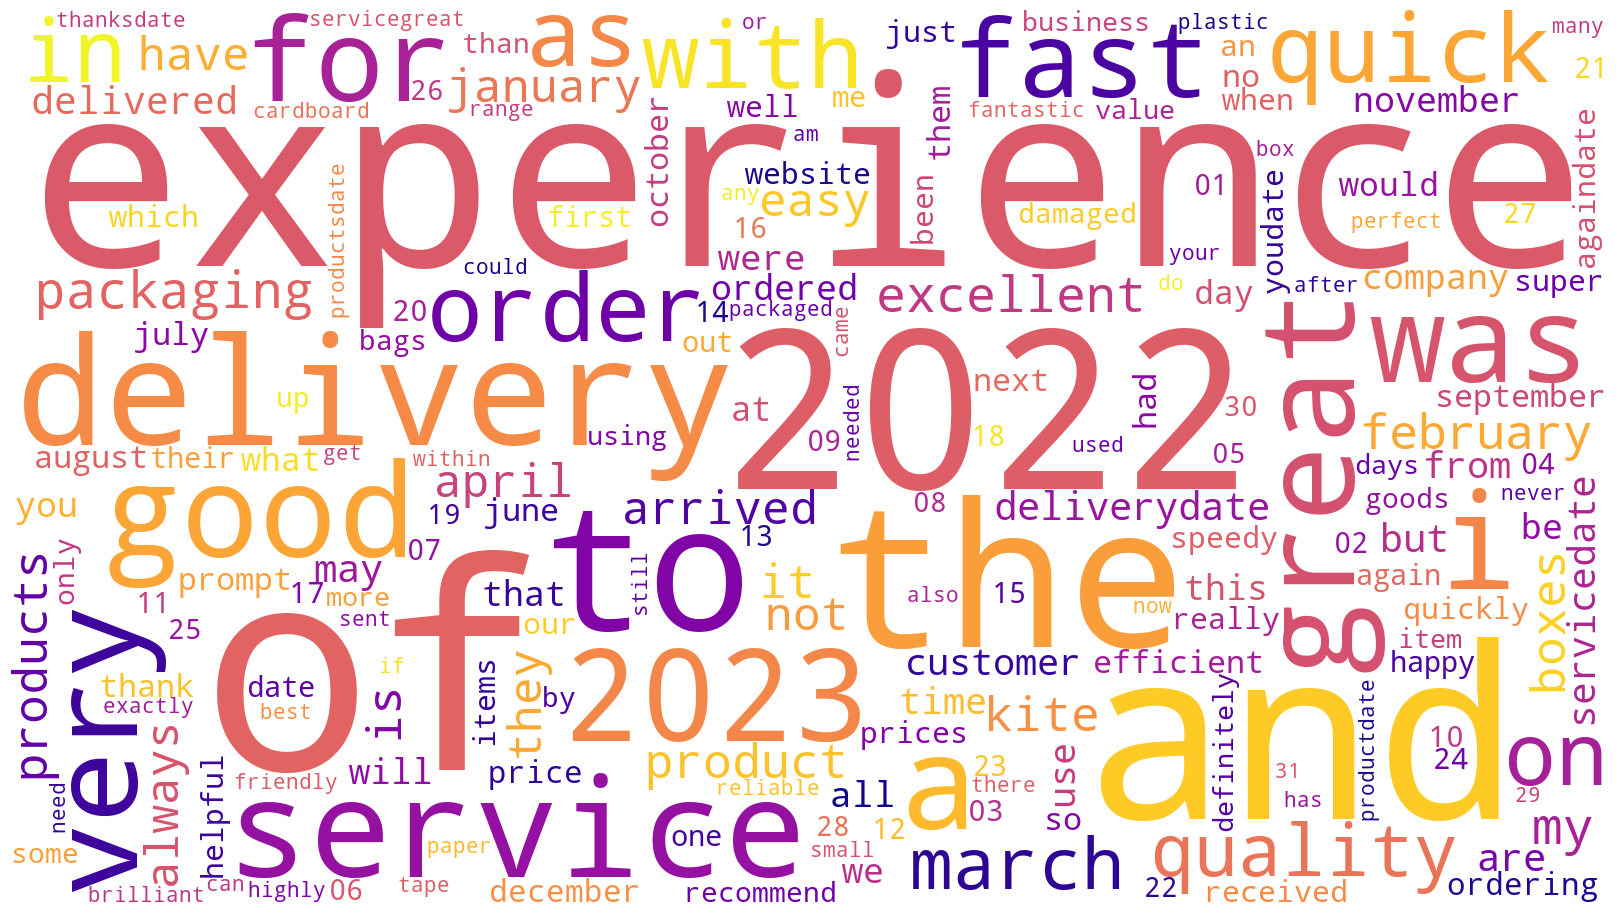

In [68]:
# Set the colour palette.
sns.set_palette("colorblind")

# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

# View the wordcloud.
plt.show()

Experience seems to be a word that occurs often in reviews.

#### Create a frequency distribution

In [69]:
# Determine the frequency distribution.
from nltk.probability import FreqDist

# Flatten the list of lists.
review_tokens = [token for tokens in reviews1['review_tokens'] for token in tokens]

# View the frequency distribution for review_tokens.
fdist1 = FreqDist(review_tokens)

# Preview the data.
fdist1

FreqDist({'of': 7196, 'experience': 5908, 'and': 5002, '2022': 4235, 'the': 3403, 'to': 2551, 'delivery': 2156, 'service': 1832, 'i': 1734, 'a': 1689, ...})

In [70]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

,Frequency
Word,
of,7196
experience,5908
and,5002
2022,4235
the,3403
to,2551
delivery,2156
service,1832
i,1734


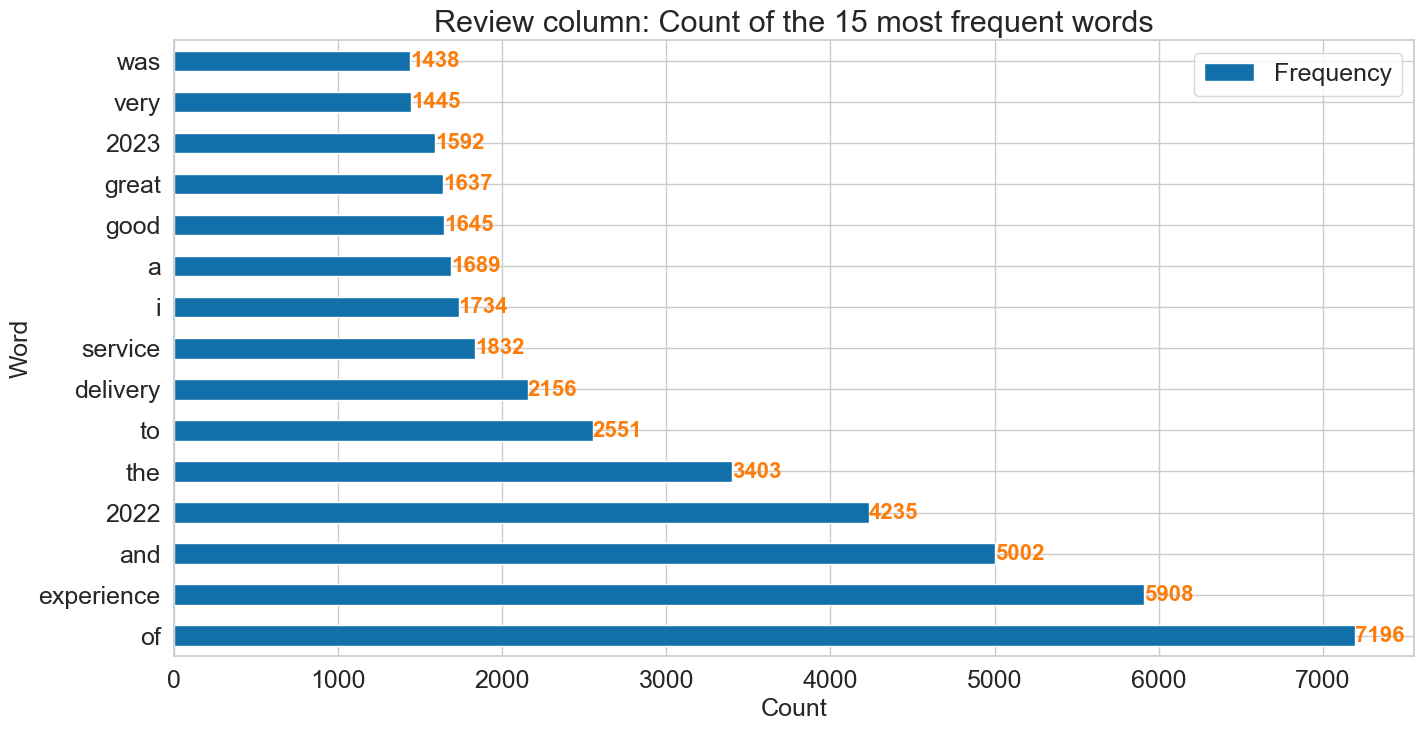

In [71]:
# Chart of the most frequent words in the reviews.

# Set the plot style.
sns.set_style("whitegrid")

# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 8), fontsize=18,
                        color='#1170aa')

# Set the labels.
ax.set_xlabel('Count', fontsize=18)
ax.set_ylabel('Word', fontsize=18)
ax.set_title("Review column: Count of the 15 most frequent words",
             fontsize=22)

# Set the legend font size.
ax.legend(fontsize=18)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=16, color='#fc7d0b', fontweight='bold')
    
# View the chart.
plt.show()

Again, experience seems to occur often. However, the most frequent words used in the reviews are general and not specific to any product or service. This indicates that customers tend to write reviews in a generic manner. Removing the 'stopwords' would be a useful exercise to see if we can gather more useful information.

#### Remove alphanumeric characters and stopwords

Removing alphanumeric characters and stopwords is important for several reasons:

Stopwords: These are commonly used words such as "the," "and," "a," and "of" that occur frequently in text but do not contribute much to the meaning of the text. Removing these words can help to focus on the more meaningful words in the text and improve the accuracy of text analysis.

Alphanumeric characters: These are characters that are both letters and numbers, such as "a1" or "3b". They may not be relevant to the text analysis and can cause issues with data processing, so removing them can help to ensure that the text analysis is accurate.

Overall, removing stopwords and alphanumeric characters can help to improve the accuracy and effectiveness of text analysis by reducing noise in the data and focusing on the most meaningful words. We can see from the charts above that 'stopwords' are particularly prolific in the 'Review' column. They provide no insight about the meaning of the text. Removing them will help ensure that text analysis is accurate and more insightful.

In [72]:
# Delete all the alpanum.
import re

# Define regular expression pattern to match alphanumeric characters.
pattern = '[^\w\s]'  

# Delete all the alpanum from the Review_Tokens.
reviews1['review_tokens'] = reviews1['review_tokens'].\
apply(lambda tokens: [re.sub(pattern, '', token) for token in tokens])

In [73]:
# Remove all the stopwords.
from nltk.corpus import stopwords

# Create a set of English stopwords.
stopwords = set(stopwords.words('english'))

# Remove all the stopwords from the Review_Tokens.
reviews1['review_tokens'] = reviews1['review_tokens'].\
apply(lambda tokens: [token for token in tokens if token.lower() not in stopwords])

#### Create a wordcloud without stopwords

In [74]:
# Set the colour palette.
sns.set_palette('Set2')

# Create a wordcloud without stop words.
# Review: Create a word cloud.
# String all the comments together in a single variable.
review_comments2 = ''
for i in range(reviews1.shape[0]):
    # Add each comment.
    review_comments2 = review_comments2 + ' '.join(reviews1['review_tokens'][i]) + ' '
    
# Count the frequency of each word in the input text. 
# Resulting dictionary-like object is stored in the 'word_freq1' variable. 
word_freq2 = Counter(review_comments2.split())

# Create a word cloud.
wordcloud2 = WordCloud(width=1600, height=900, 
                      background_color='white', 
                      colormap='plasma', 
                      min_font_size=10, 
                      stopwords=set(stopwords)).generate_from_frequencies(word_freq2)

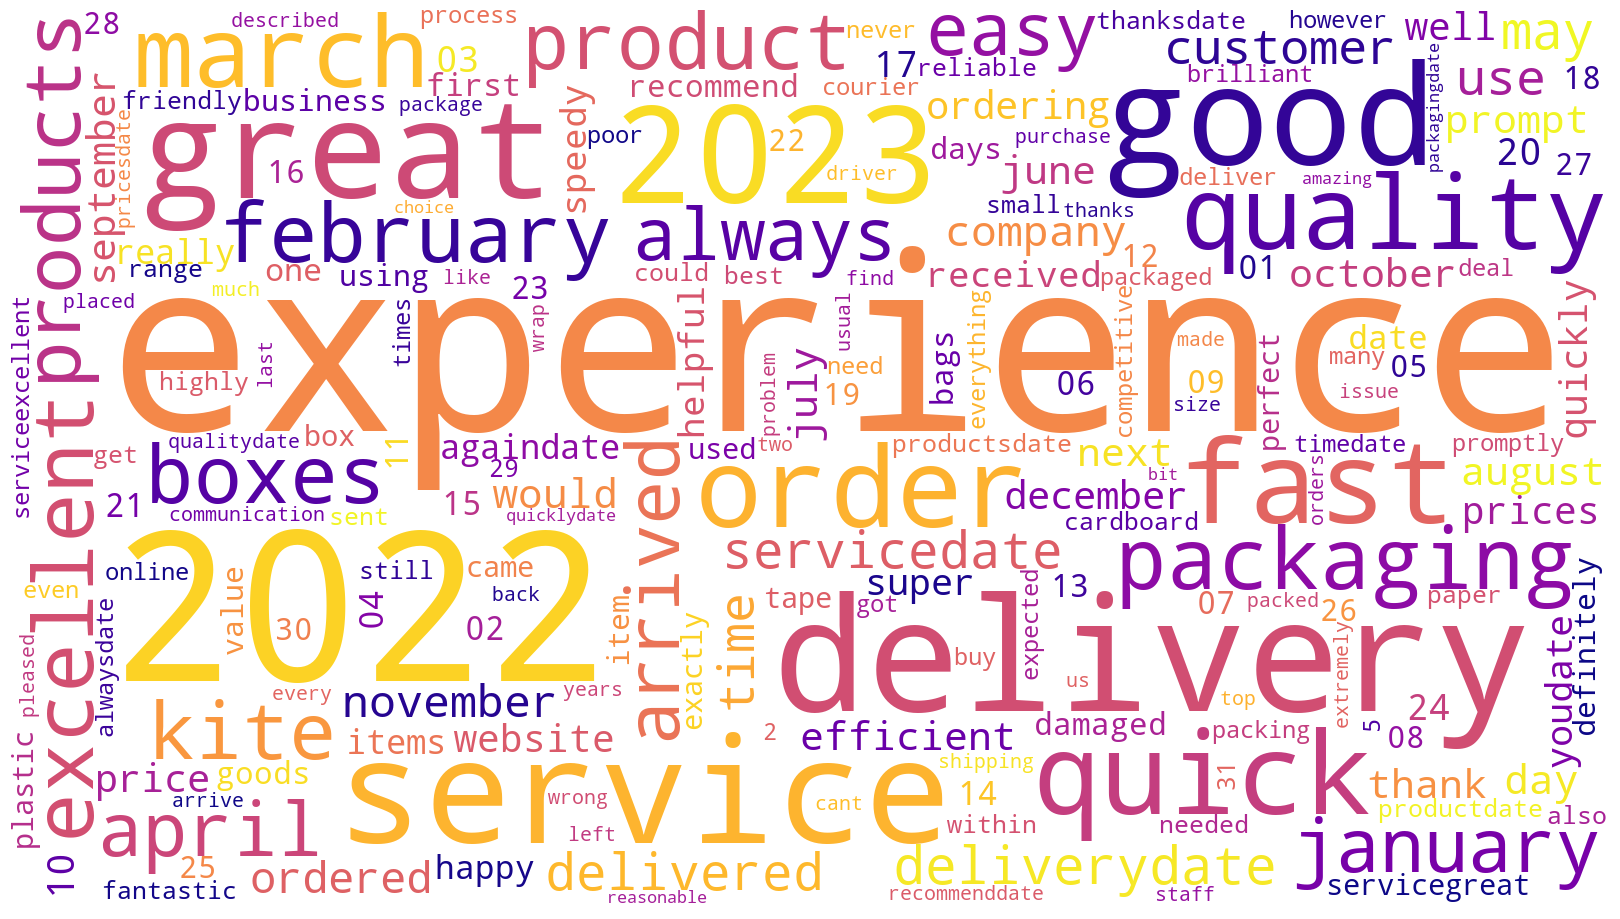

In [75]:
# Set the colour palette.
sns.set_palette("colorblind")

# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

# View the wordcloud.
plt.show()

Again, experience seems to be a popular word in the Trustpilot reviews. We can also see some other interesting words too. Let's look at the words that occur most often.

#### Identify the 15 most common words

In [76]:
# Determine the 15 most common words.
# After removing stopwords.

# Flatten the list of lists.
review_tokens = [token for tokens in reviews1['review_tokens'] for token in tokens]

# View the frequency distribution for review_tokens.
fdist3 = FreqDist(review_tokens)

# Preview the data.
fdist3

FreqDist({'experience': 5908, '2022': 4235, 'delivery': 2156, 'service': 1832, 'good': 1645, 'great': 1637, '2023': 1592, 'fast': 1099, 'quick': 1086, 'order': 1046, ...})

In [77]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(review_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

,Frequency
Word,
experience,5908
2022,4235
delivery,2156
service,1832
good,1645
great,1637
2023,1592
fast,1099
quick,1086


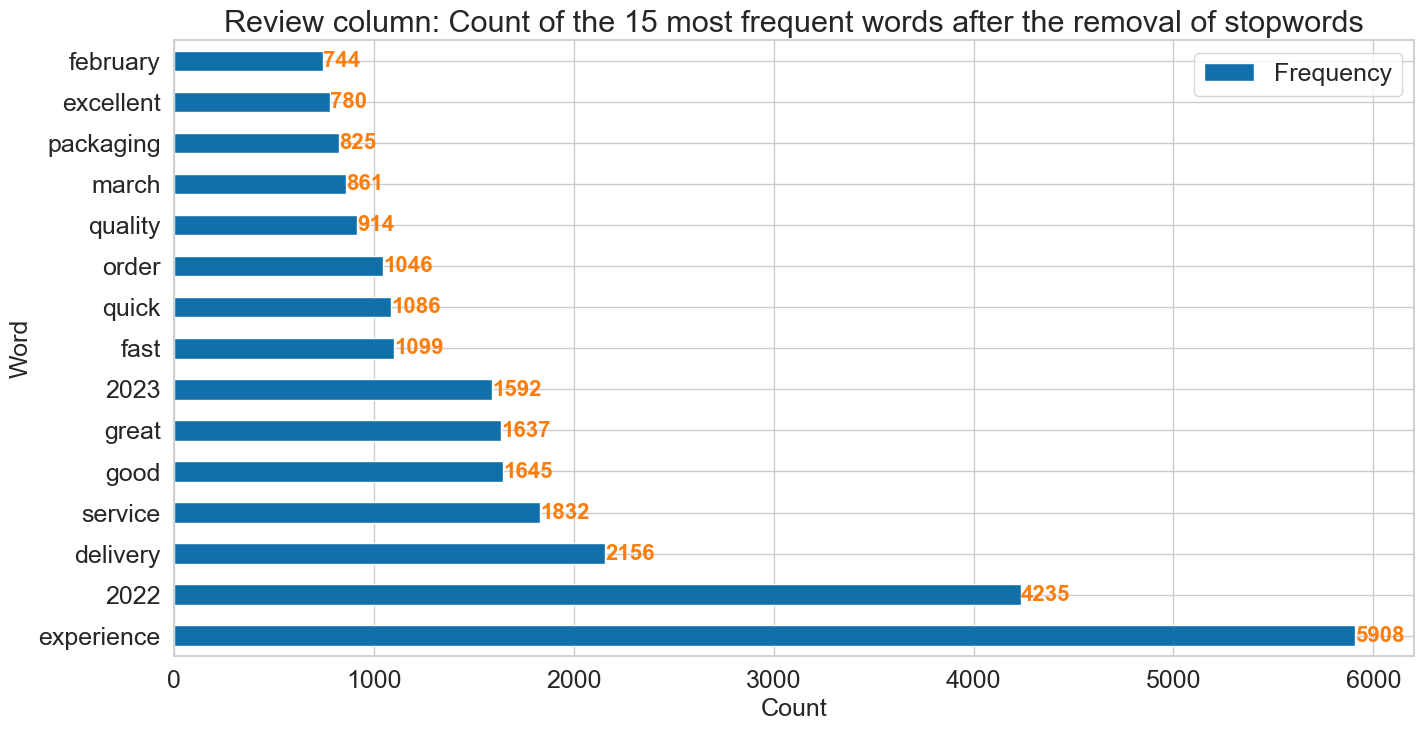

In [78]:
# Chart of the most frequent words in the reviews
# After the removal of stopwords.

# Set the plot style.
sns.set_style("whitegrid")

# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 8), fontsize=18,
                        color='#1170aa')

# Set the labels.
ax.set_xlabel('Count', fontsize=18)
ax.set_ylabel('Word', fontsize=18)
ax.set_title("Review column: Count of the 15 most frequent words \
after the removal of stopwords",
             fontsize=22)

# Set the legend font size.
ax.legend(fontsize=18)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=16, color='#fc7d0b', fontweight='bold')

# View the chart.
plt.show()

After removing the stopwords from the text, the most frequently used words are experience, 2022, delivery, service, and good. It is interesting that delivery features a lot in reviews. 

# 

## Polarity and Subjectivity Scores

Now let's check out the polarity and subjectivity of the reviews to understand them in a bit more detail.

#### Calculate the sentiment polarity score

Sentiment polarity scores are calculated based on the degree of positive, negative, or neutral sentiment expressed in a text. A positive sentiment indicates that text expresses a favorable or positive opinion or emotion, whereas a negative sentiment indicates the opposite - an unfavorable or negative opinion or emotion. A neutral sentiment means text expresses neither a positive nor a negative opinion or emotion. Textblob assigns a polarity score to each text, between -1 and +1. The closer the score is to -1, the more negative the sentiment, while the closer the score is to +1, the more positive the sentiment. A score of 0 indicates a neutral sentiment.

NOTE: Sentiment polarity scores are not always accurate and can be influenced by factors such as sarcasm, irony, or the context of the text. It is also important to consider the limitations of the sentiment analysis tool being used, as different tools may provide different results based on the underlying algorithms and training data.

Overall, sentiment polarity scores can be a useful tool for analyzing large volumes of text data quickly and efficiently, but should be used with caution and in conjunction with other methods of text analysis and interpretation.

In [79]:
# Function to extract the polarity score of a comment.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [80]:
# Determine polarity of reviews.
reviews1['review_polarity'] = reviews1['Review'].apply(generate_polarity)

# View the output for the reviews.
print("Review polarity scores:")
print(reviews1['review_polarity'].round(3).head())

Review polarity scores:
0   -0.092
1   -0.128
2    0.193
3    0.750
4    0.197
Name: review_polarity, dtype: float64


#### Calculate the sentiment subjectivity score

The sentiment subjectivity score is a measure of the degree to which a text expresses a personal opinion or emotion, rather than factual information. Subjectivity is the extent to which a text is influenced by the respondent's feelings, beliefs, or attitudes. A highly subjective text expresses a personal opinion or emotion in a way that is not necessarily grounded in fact or evidence, wihle a highly objective text presents information in an unbiased, neutral way that is not influenced by personal opinion or emotion. The sentiment subjectivity score is expressed as a value between 0 and 1, where 0 indicates a very objective statement and 1 indicates a very subjective statement. A subjectivity score of 0 means that the text contains only factual information and does not express any personal opinions or emotions. A subjectivity score of 1 means that the text is entirely subjective and does not contain any objective information.

Overall, sentiment subjectivity scores are a useful tool for understanding the degree to which a text expresses personal opinions or emotions, and can help to distinguish between factual information and subjective statements.

In [81]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    '''Extract subjectivity score (0 to 1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [82]:
# Determine subjectivity of reviews.
reviews1['review_subjectivity'] = reviews1['Review'].apply(generate_subjectivity)

# View the output for the reviews.
print("Review subjectivity scores:")
print(reviews1['review_subjectivity'].round(3).head())

Review subjectivity scores:
0    0.300
1    0.531
2    0.353
3    0.675
4    0.406
Name: review_subjectivity, dtype: float64


#### Visualisations of the polarity and subjectivity scores

Now that we have the polarity and subjectivity scores for the reviews, let's visualise them to get a better look at what is going on.

In [83]:
# Set the chart formatting.
# Set the style.
sns.set_style("whitegrid")

# Set the font sizes.
plt.rcParams.update({'font.size': 18, 
                     'axes.labelsize': 18, 
                     'legend.fontsize': 18, 
                     'axes.titlesize': 22,
                     'xtick.labelsize': 18, 
                     'ytick.labelsize': 18})

# Set the color.
color = "#1170aa"

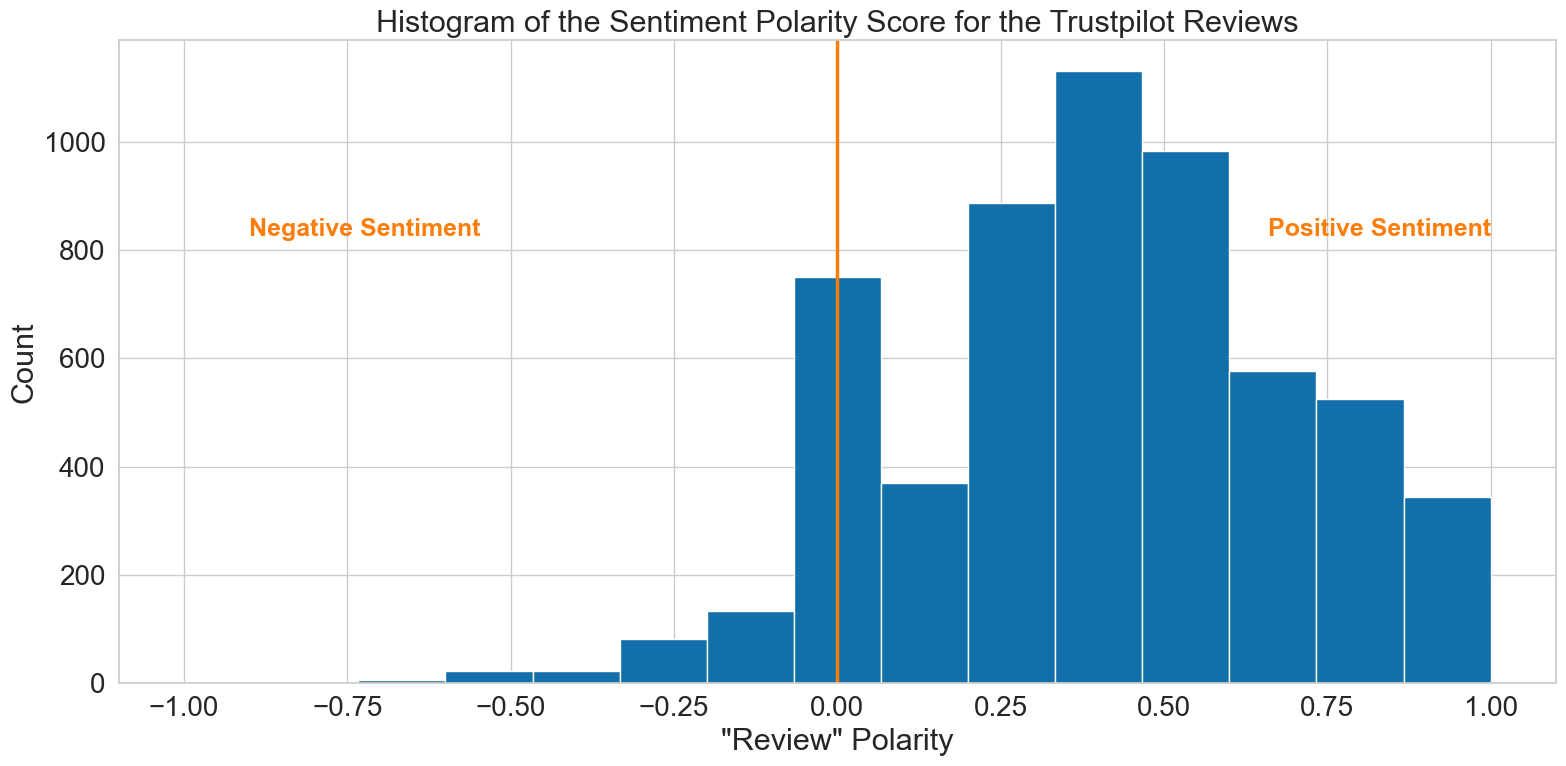

In [84]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity score for the reviews.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,8))

# Define the bars.
n, bins, patches = plt.hist(reviews1['review_polarity'], 
                            num_bins, facecolor=color)

# Add a vertical line at 0.
plt.axvline(x=0, color='#fc7d0b', linewidth=2.5)

# Add annotations.
plt.text(1.0, max(n)*0.73, 'Positive Sentiment', 
         color="#fc7d0b", fontsize=18, ha='right', 
         va='baseline', weight='bold')
plt.text(-0.9, max(n)*0.73, 'Negative Sentiment', 
         color="#fc7d0b", fontsize=18, ha='left', 
         va='baseline', weight='bold')

# Set the labels and title.
plt.xlabel('"Review" Polarity', fontsize=22)
plt.ylabel('Count', fontsize=22)
plt.title('Histogram of the Sentiment Polarity Score \
for the Trustpilot Reviews', fontsize=22)

# Set the font size of tick labels.
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the plot.
plt.tight_layout()
filename = 'review polrity score.png'
plt.savefig(filename)

# Show the plot.
plt.show()

The sentiment polarity score analysis shows that the vast majority of the reviews are positive, which is a good indication for Kite packaging. By analysing the positive reviews, Kite can identify the features of their products and deliveries that customers appreciate the most. 

In [85]:
# Calculate the average polarity score for the reviews.
avg_polarity_score = reviews1['review_polarity'].mean()
print("Average polarity score for reviews: {:.2f}".format(avg_polarity_score))

Average polarity score for reviews: 0.40


In [86]:
# Table summary of polarity score for the reviews.
def get_sentiment_category(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Create a new column 'Review Sentiment Category'.
reviews1['Review Sentiment Category'] = reviews1['review_polarity'].apply(get_sentiment_category)

# Count the number of comments in each category.
category_counts = reviews1['Review Sentiment Category'].value_counts()

# Create the table.
review_polarity_table = pd.DataFrame({'Count': category_counts,
                              '%': (category_counts / len(reviews1) * 100).round(2)})

# View the output.
review_polarity_table

,Count,%
Positive,4727,80.94
Neutral,888,15.21
Negative,225,3.85


Looking at the table, we can see that just over 80% of reviews are positive. This is great for Kite. We can also see that less than 4% of reviews are classified as negative. 

Note that in the table above, reviews with polarity scores between -0.1 and 0.1 are classified as neutral. While a strict definition of neutral may consider only a score of exactly 0, such a definition would very narrow and not provide much insight. By using a slightly wider range, we are able to capture reviews that are mostly neutral but may have some slight positive or negative sentiment. This decision will provide a more nuanced understanding of the sentiment in the reviews and allow for a more accurate analysis of customer feedback.

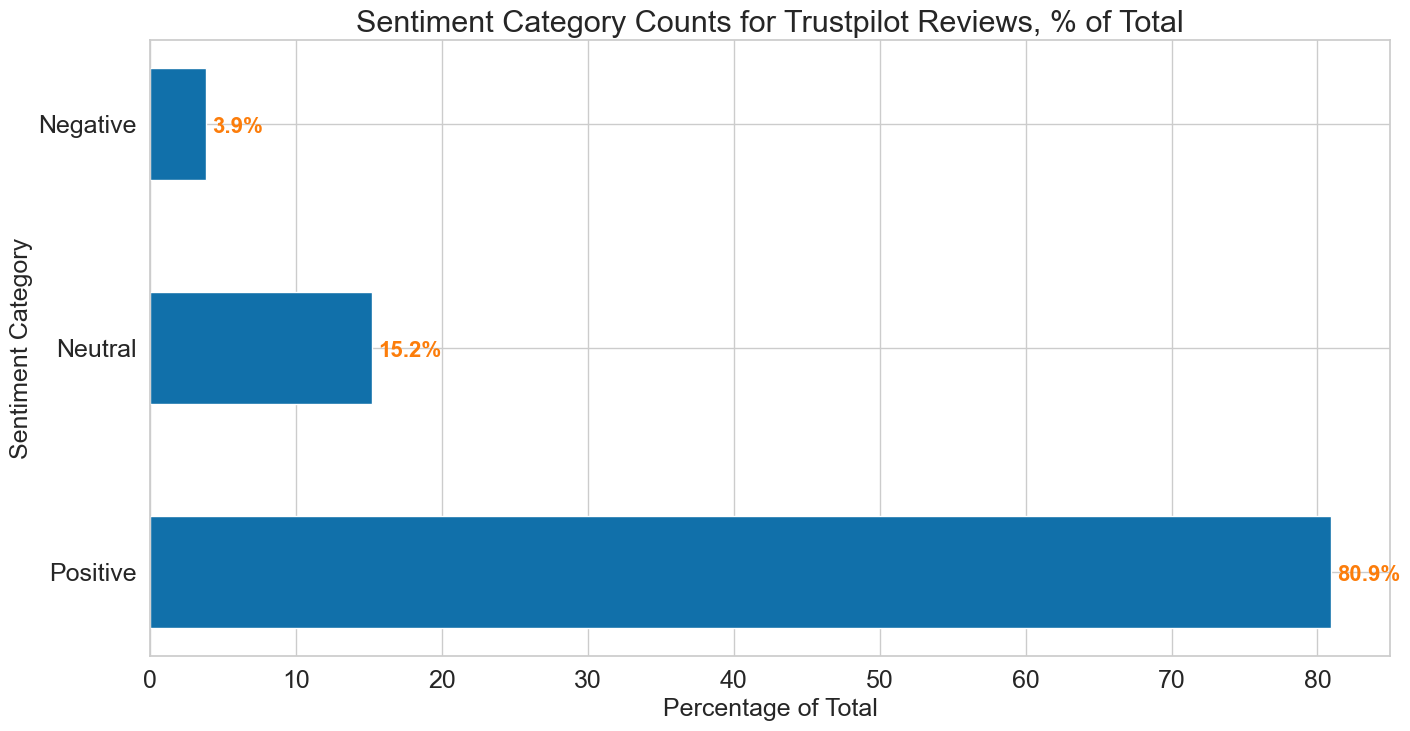

In [87]:
# Create a horizontal bar chart to visualise the table summary.
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(review_polarity_table.index, 
        review_polarity_table['%'], 
        height=0.5, color='#1170aa')

# Set the chart title and axis labels.
ax.set_title('Sentiment Category Counts for Trustpilot Reviews, % of Total')
ax.set_xlabel('Percentage of Total')
ax.set_ylabel('Sentiment Category')

# Add the percentage values to the bars.
for i, v in enumerate(review_polarity_table['%']):
    ax.text(v + 0.4, i - 0.04, str(round(v, 1)) + '%', 
            fontsize=16, color='#fc7d0b', fontweight='bold')

# Show the plot.
plt.show()

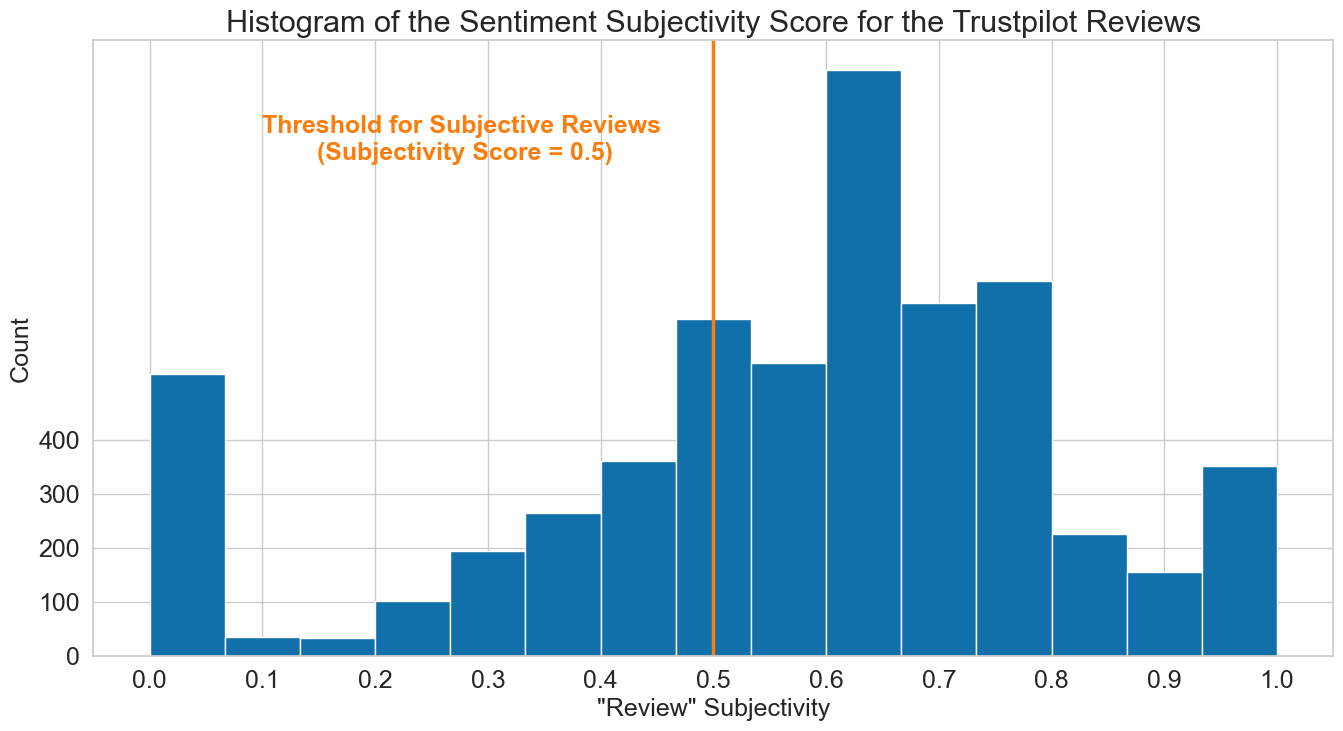

In [88]:
# Histogram of subjectivity score for the reviews.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,8))

# Define the bars.
n, bins, patches = plt.hist(reviews1['review_subjectivity'], 
                            num_bins, facecolor=color)

# Add a vertical line at 0.5.
plt.axvline(x=0.5, color='#fc7d0b', linewidth=2.5)

# Add annotations.
plt.text(0.28, max(n)*0.88, 'Threshold for Subjective Reviews \
\n(Subjectivity Score = 0.5)', 
         color="#fc7d0b", fontsize=18, ha='center', 
         va='center', weight='bold')

# Set the labels and title.
plt.xlabel('"Review" Subjectivity', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Histogram of the Sentiment Subjectivity Score \
for the Trustpilot Reviews', fontsize=22)

# Set the font size of tick labels.
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.yticks(np.arange(0, 500, 100),fontsize=18)

# Show the plot.
plt.show()

In subjectivity analysis, a score of 0.5 usually represents the threshold between subjective and objective language. Text with a score above 0.5 is considered subjective, meaning it contains opinions, beliefs, or personal experiences, while text with a score below 0.5 is considered objective, meaning it is factual and unbiased.

In this case, many of the scores are above 0.5, suggesting reviews may exhibit more subjective language (than objective language). This is corroborated in the table below. Therefore, it's important to interpret the results in the appropriate context and consider factors that may influence the subjectivity of the text.

In [89]:
# Table summary of subjectivity score for the reviews.
def get_subjectivity_category(subjectivity):
    if subjectivity > 0.5:
        return "More Subjective"
    else:
        return "Less Subjective"

# Create a new column 'Review Subjectivity Category'.
reviews1['Review Subjectivity Category'] = reviews1['review_subjectivity'].\
apply(get_subjectivity_category)

# Count the number of comments in each category.
category_counts = reviews1['Review Subjectivity Category'].value_counts()

# Create the table.
review_subjectivity_table = pd.DataFrame({'Count': category_counts,
                              '%': (category_counts / len(reviews1) * 100).round(2)})

# View the output.
review_subjectivity_table

,Count,%
More Subjective,3882,66.47
Less Subjective,1958,33.53


There is a skew towards subjective language.

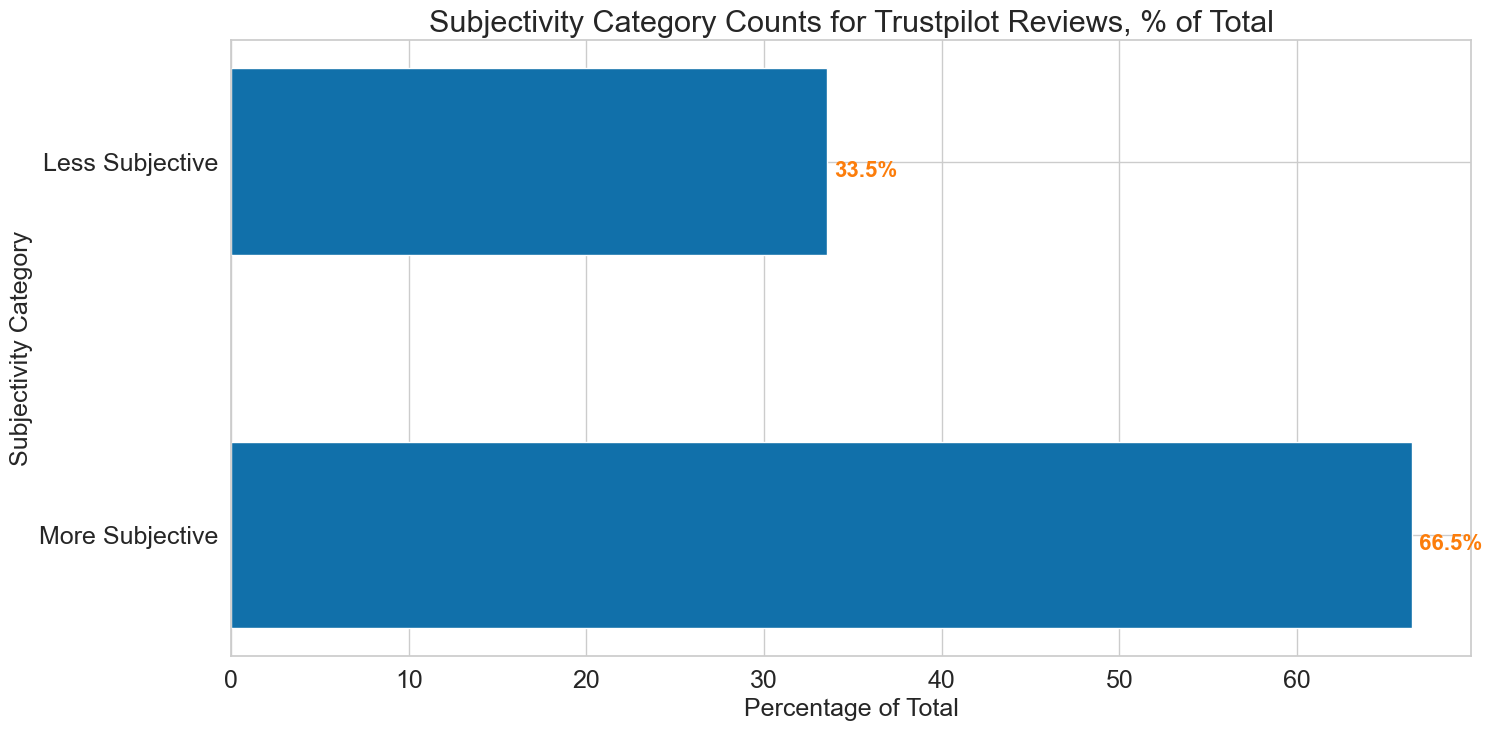

In [90]:
# Create a horizontal bar chart to visualise the table summary.
fig, ax = plt.subplots(figsize=(16, 8))
ax.barh(review_subjectivity_table.index, 
        review_subjectivity_table['%'], 
        height=0.5, color='#1170aa')

# Set the chart title and axis labels.
ax.set_title('Subjectivity Category Counts for Trustpilot Reviews, % of Total')
ax.set_xlabel('Percentage of Total')
ax.set_ylabel('Subjectivity Category')

# Add the percentage values to the bars.
for i, v in enumerate(review_subjectivity_table['%']):
    ax.text(v + 0.4, i - 0.04, str(round(v, 1)) + '%', 
            fontsize=16, color='#fc7d0b', fontweight='bold')

# Show the plot.
plt.show()

# 

## Identify the Top 20 Positive and Negative Reviews

Now, let's think about looking at the top 20 positive and negative Trustpilot reviews for Kite. This could reveal some insightful customer opinions.

#### Negative reviews

Find the comments that have a negative sentiment. This code uses the nsmallest() function on the review_polarity DataFrame to return the rows with the 20 lowest values under polarity.

In [91]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = reviews1.nsmallest(20, 'review_polarity')

# Reset index and add numbering column.
negative_sentiment_review = negative_sentiment_review.\
reset_index(drop=True)
negative_sentiment_review.index += 1
negative_sentiment_review.index.name = 'Rank'

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review\
[['Review', 'review_polarity']]

# View the output (adjust the column width).
negative_sentiment_review.style.\
set_properties(subset=['Review'], **{'width': '1200px'})

,Review,review_polarity
Rank,,
1,absolutely horrible customer serviceabsolutely horrible customer service and handling of customer queriesdate of experience april 27 2023,-1.000000
2,awful company with awful morales please avoidawful company awful experience please avoiddate of experience february 01 2023,-1.000000
3,terrible products terrible servicethe quality of items delivered is terrible all smashed up on the ends with no protective packaging not what i expected and not what i ordered terrible servicedate of experience april 19 2022,-0.820000
4,im a returning customerim a returning customer i have never been disappointed with the items ive ordered the service received or the speed at which my order is delivereddate of experience august 01 2022,-0.750000
5,awful serviceterrrible have had an account with kite for years and then we were switched to kite online and told you were unable to offer us a credit accountdate of experience january 31 2022,-0.750000
6,not badnot bad delivered on timedate of experience december 14 2022,-0.700000
7,really bad quality boxes bent onreally bad quality boxes bent on delivery bad on the folds will not be ordering againdate of experience august 26 2022,-0.700000
8,badly packedbadly packed boxes arrive splittorn with shred spilling outdate of experience september 05 2022,-0.700000
9,terrible companyabsolutely shiite company stealing away money and never refunding back the customer thieving btardsdisgusting so called service and disgusting attitudedate of experience march 16 2022,-0.666667


#### Positive reviews

Find the comments that have a negative sentiment. This code uses the nlargest() function on the review_polarity DataFrame to return the rows with the 20 lowest values under polarity.

In [92]:
# Top 20 positive reviews.
positive_sentiment_review = reviews1.nlargest(20, 'review_polarity')

# Reset index and add numbering column.
positive_sentiment_review = positive_sentiment_review.\
reset_index(drop=True)
positive_sentiment_review.index += 1
positive_sentiment_review.index.name = 'Rank'

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review\
[['Review', 'review_polarity']]

# View the output (adjust the column width).
positive_sentiment_review.style.\
set_properties(subset=['Review'], **{'width': '1200px'})

,Review,review_polarity
Rank,,
1,excellent servicegood product helpful responsive staffdate of experience may 08 2023,1.000000
2,best ecommerce boxesgreat product prompt deliverydate of experience may 08 2023,1.000000
3,perfect service as alwaysdate of experience may 02 2023,1.000000
4,awesome speedy delivery as alwaysawesome speedy delivery as always i wouldnt buy from anywhere elsedate of experience april 24 2023,1.000000
5,excellent productsexcellent products and always delivered quicklydate of experience april 25 2023,1.000000
6,excellent product and serviceexcellent product and service would buy from againdate of experience april 19 2023,1.000000
7,excellent serviceitems were in stock and delivered within 2 working days excellent servicedate of experience april 19 2023,1.000000
8,always have excellent service from thisalways have excellent service from this company never use anyone elsedate of experience april 19 2023,1.000000
9,excellent servicedate of experience april 17 2023,1.000000


# 

## Filter reviews with a 'rating' of 1

Let's filter for just one-star reviews, to see what issues may be associated with the lowest rating reviews (poorest_reviews).

In [93]:
# Filter the reviews for those with a rating of 1.
poorest_reviews = reviews1[(reviews1['Rating'] == 1)]

# Reset the index. 
poorest_reviews = poorest_reviews.reset_index(drop=True)

# View the output.
poorest_reviews.head()

,User,Review Number,Rating,Location,Date,Review,review_tokens,review_polarity,review_subjectivity,Review Sentiment Category,Review Subjectivity Category
0,Ros Reynolds,4 reviews,1,GB,12 minutes agoVerified,consistently fails to deliver fullconsistently...,"[consistently, fails, deliver, fullconsistentl...",-0.091667,0.300000,Neutral,Less Subjective
1,Jasmine Maidment,3 reviews,1,GB,An hour agoVerified,awful experiencei was sent an email saying my ...,"[awful, experiencei, sent, email, saying, deli...",-0.127778,0.530556,Negative,More Subjective
2,BM,2 reviews,1,GB,7 days agoVerified,very bad pallet wrappingvery bad pallet wrappi...,"[bad, pallet, wrappingvery, bad, pallet, wrapp...",-0.630000,0.625000,Negative,More Subjective
3,SHEILA PARMAR,1 review,1,GB,"May 10, 2023Verified",the last three orders for shrink wrapthe last ...,"[last, three, orders, shrink, wrapthe, last, t...",0.058333,0.291667,Neutral,Less Subjective
4,Richard Grimshaw,4 reviews,1,GB,"May 15, 2023Verified",deplorable customer servicewe have been a loya...,"[deplorable, customer, servicewe, loyal, custo...",0.026316,0.443860,Neutral,Less Subjective


Now that we have filtered for one-star reviews, let's create a word cloud image to see what words occur most often. 

#### Wordcloud

In [94]:
# Create a Wordcloud.
one_reviews = ''
for i in range(poorest_reviews.shape[0]):
    one_reviews = one_reviews + ' '.join(poorest_reviews['review_tokens'][i]) + ' '
    
# Count the frequency of each word in the input text. 
# Resulting dictionary-like object is stored in the 'word_freq3' variable. 
word_freq3 = Counter(one_reviews.split())

# Generate word cloud using 'generate_from_frequencies' method and 'word_freq3' object.
# An empty set is passed as the 'stopwords' argument so no words are excluded.
wordcloud3 = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 5, stopwords=set()).generate_from_frequencies(word_freq3)

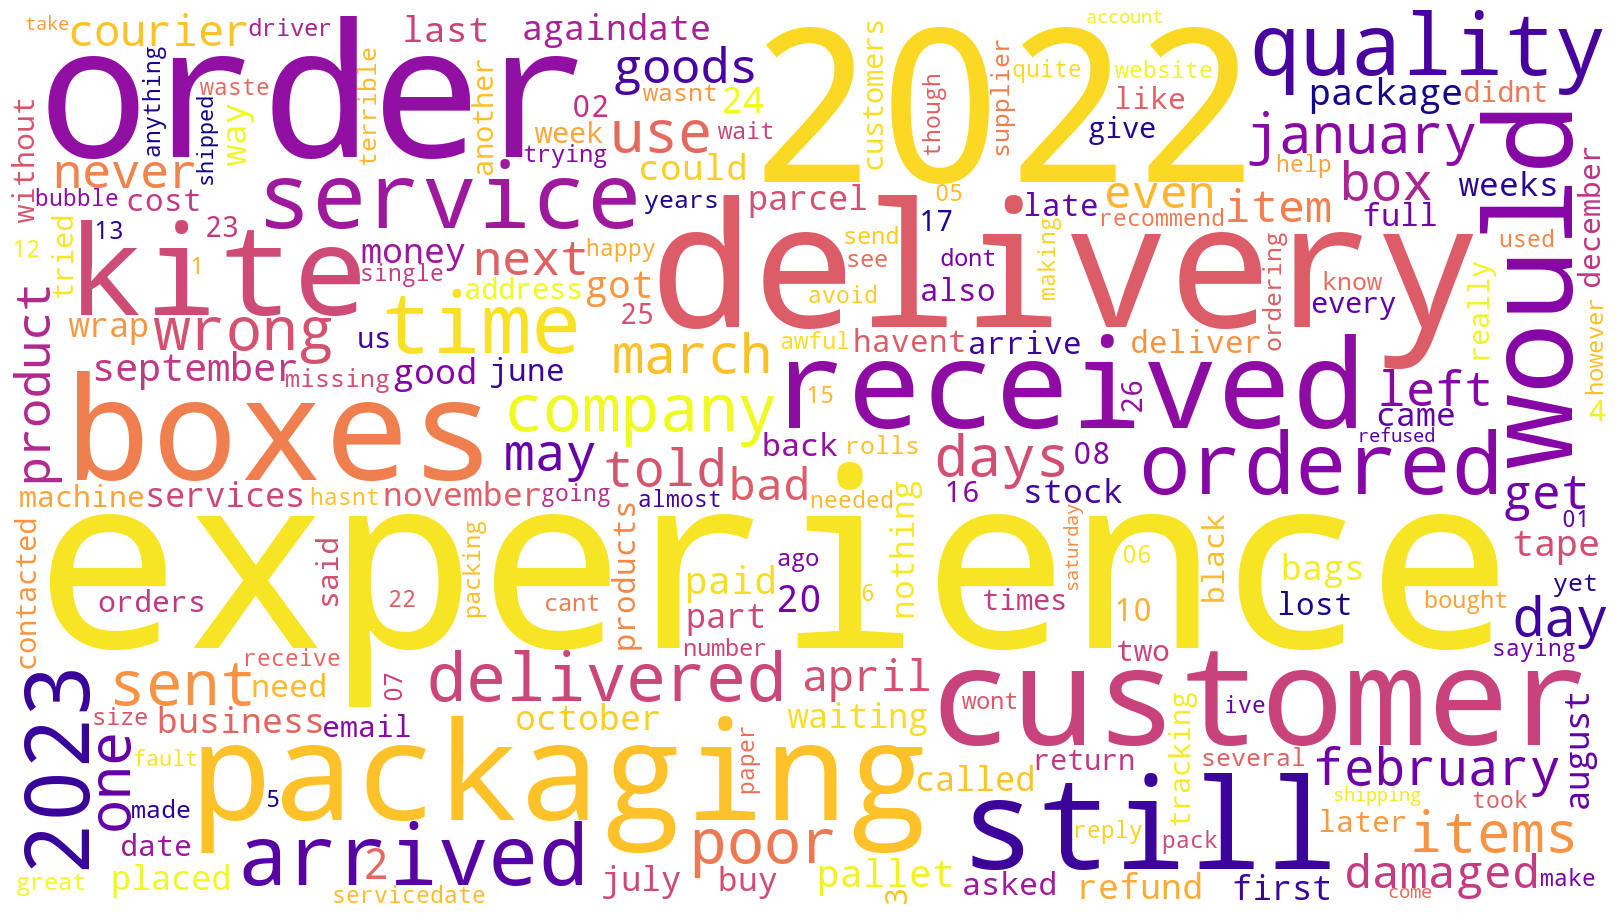

In [95]:
# Set the colour palette.
sns.set_palette("colorblind")

# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor = None)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)

# View the wordcloud.
plt.show()

Unsurprisingly, experience occurs a lot, but what else?

#### Word frequency distribution

In [96]:
# Determine the frequency distribution.
from nltk.probability import FreqDist

# Flatten the list of lists.
review_tokens = [token for tokens in poorest_reviews['review_tokens'] for token in tokens]

# View the frequency distribution for review_tokens.
fdist3 = FreqDist(review_tokens)

# Preview the data.
fdist3

FreqDist({'experience': 251, '2022': 186, 'order': 135, 'delivery': 119, 'boxes': 76, 'customer': 71, 'packaging': 71, 'still': 60, 'kite': 59, 'received': 58, ...})

In [97]:
# Import the Counter class.
from collections import Counter

# Generate a DataFrame from Counter.
review_counts_poorest = pd.DataFrame(Counter(review_tokens).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts_poorest

,Frequency
Word,
experience,251
2022,186
order,135
delivery,119
boxes,76
customer,71
packaging,71
still,60
kite,59


The top five words now are experience, 2022, order, delivery, and boxes. It is interesting that delivery is mentioned a lot in the one-star reviews for Kite. This should be a motivation for Kite to have more control of their delivery service, to improve their customer's experience of it. Bringing in more in-house deliveries would be a way of doing this. 

#### Polarity scores

In [98]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [99]:
# Determine polarity of Review column.
poorest_reviews['review_polarity'] = poorest_reviews['Review'].apply(generate_polarity)

# View the output for the Review column.
print("Review polarity scores:")
print(poorest_reviews['review_polarity'].round(3).head())

Review polarity scores:
0   -0.092
1   -0.128
2   -0.630
3    0.058
4    0.026
Name: review_polarity, dtype: float64


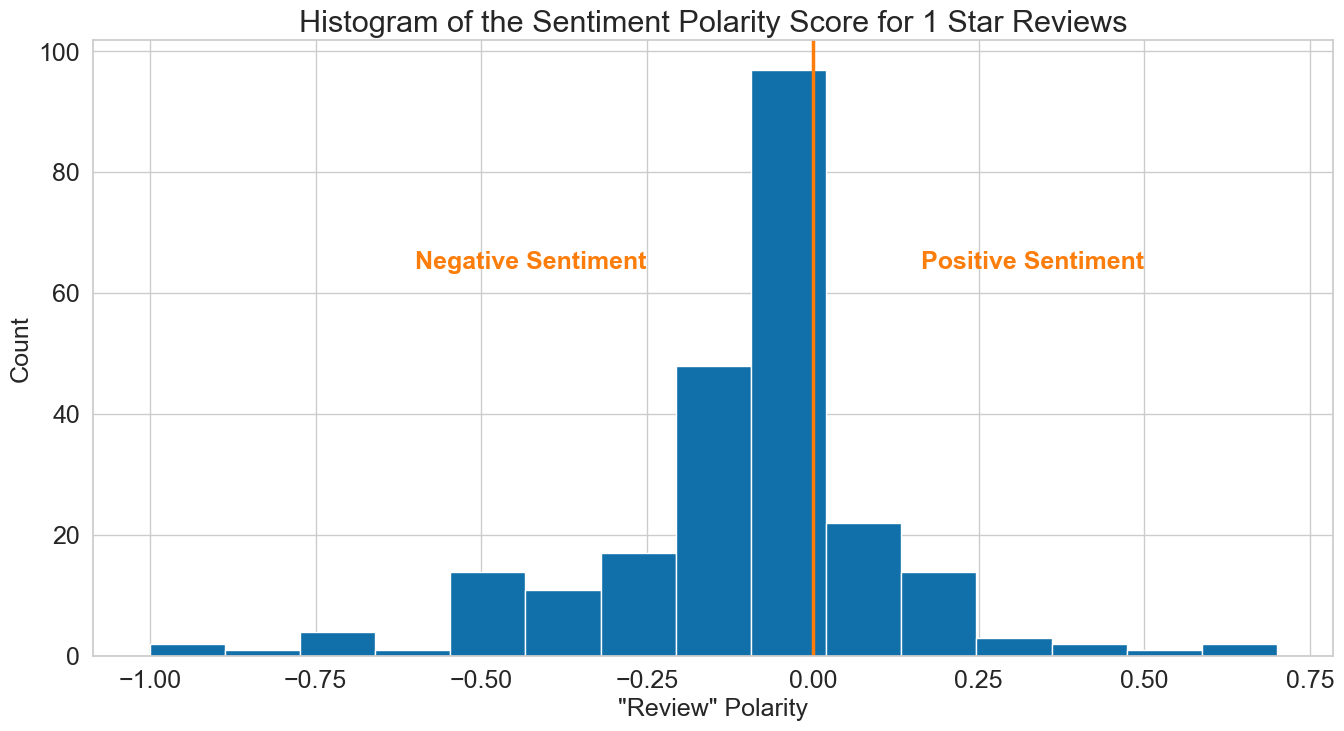

In [100]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity score for the "Review" column.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,8))

# Define the bars.
n, bins, patches = plt.hist(poorest_reviews['review_polarity'], 
                            num_bins, facecolor=color)

# Add a vertical line at 0.
plt.axvline(x=0, color='#fc7d0b', linewidth=2.5)

# Add annotations.
plt.text(0.5, max(n)*0.66, 'Positive Sentiment', 
         color="#fc7d0b", fontsize=18, ha='right', 
         va='baseline', weight='bold')
plt.text(-0.6, max(n)*0.66, 'Negative Sentiment', 
         color="#fc7d0b", fontsize=18, ha='left', 
         va='baseline', weight='bold')

# Set the labels and title.
plt.xlabel('"Review" Polarity', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Histogram of the Sentiment Polarity Score \
for 1 Star Reviews', fontsize=22)

# Set the font size of tick labels.
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Show the plot.
plt.show()

Now, the number of positive sentiment polarity scores has reduced dramatically. This makes sense though, seeing as we're only looking at one-star reviews.

In [101]:
# Table summary of polarity score for the Review column.
def get_sentiment_category(polarity):
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

# Create a new column 'Review Sentiment Category'.
poorest_reviews['Review Sentiment Category'] = poorest_reviews['review_polarity'].\
apply(get_sentiment_category)

# Count the number of comments in each category.
category_counts = poorest_reviews['Review Sentiment Category'].value_counts()

# Create the table.
review_polarity_table_poorest = pd.DataFrame({'Count': category_counts,
                              '%': (category_counts / len(poorest_reviews) * 100).round(2)})

# View the output.
review_polarity_table_poorest

,Count,%
Neutral,120,50.21
Negative,93,38.91
Positive,26,10.88


Here, we can see that the percentage of reviews with a negative sentiment polarity score is greater than those with a positive.

#### Subjectivity scores

In [102]:
# Define a function to extract a subjectivity score for the comment.
def generate_subjectivity(comment):
    '''Extract subjectivity score (0 to 1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [103]:
# Determine subjectivity of Review column.
poorest_reviews['review_subjectivity'] = poorest_reviews['Review'].apply(generate_subjectivity)

# View the output for the Review column.
print("Review subjectivity scores:")
print(poorest_reviews['review_subjectivity'].round(3).head())

Review subjectivity scores:
0    0.300
1    0.531
2    0.625
3    0.292
4    0.444
Name: review_subjectivity, dtype: float64


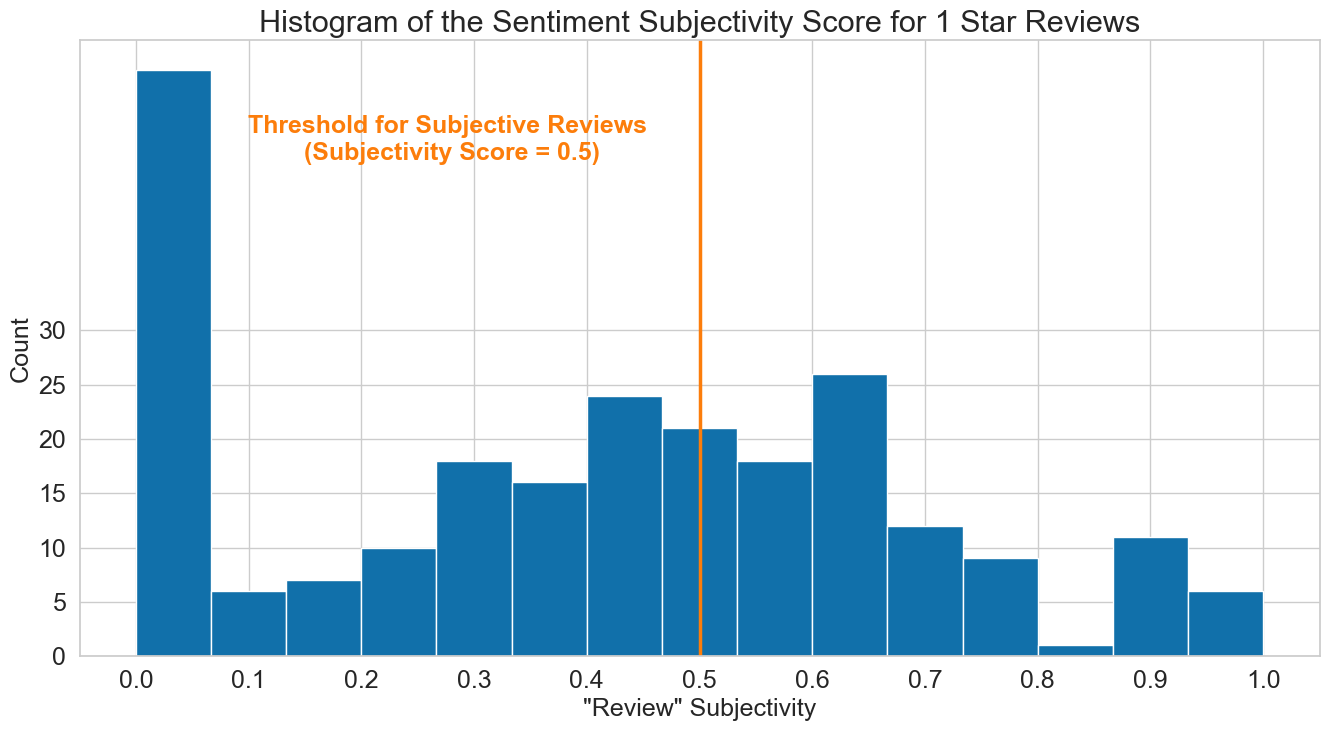

In [104]:
# Histogram of sensitivity score for the "Review" column.

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,8))

# Define the bars.
n, bins, patches = plt.hist(poorest_reviews['review_subjectivity'], 
                            num_bins, facecolor=color)

# Add a vertical line at 0.5.
plt.axvline(x=0.5, color='#fc7d0b', linewidth=2.5)

# Add annotations.
plt.text(0.28, max(n)*0.88, 'Threshold for Subjective Reviews \
\n(Subjectivity Score = 0.5)', 
         color="#fc7d0b", fontsize=18, ha='center', 
         va='center', weight='bold')

# Set the labels and title.
plt.xlabel('"Review" Subjectivity', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Histogram of the Sentiment Subjectivity Score \
for 1 Star Reviews', fontsize=22)

# Set the font size of tick labels.
plt.xticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.yticks(np.arange(0, 35, 5),fontsize=18)

# Show the plot.
plt.show()

Interestingly, it seems more reviews are objective rather than subjective now. 

In [105]:
# Table summary of subjectivity score for the "Review" column.
def get_subjectivity_category(subjectivity):
    if subjectivity > 0.5:
        return "More Subjective"
    else:
        return "Less Subjective"

# Create a new column 'Review Subjectivity Category'.
poorest_reviews['Review Subjectivity Category'] = poorest_reviews['review_subjectivity'].\
apply(get_subjectivity_category)

# Count the number of comments in each category.
category_counts = poorest_reviews['Review Subjectivity Category'].value_counts()

# Create the table.
review_subjectivity_table_poorest = pd.DataFrame({'Count': category_counts,
                              '%': (category_counts / len(poorest_reviews) * 100).round(2)})

# View the output.
review_subjectivity_table_poorest

,Count,%
Less Subjective,149,62.34
More Subjective,90,37.66


#### Most negative reviews (among 1 star reviews)

These are the most negative reviews among the one-star reviews. These will be an interesting read for Kite.

In [106]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment_review = poorest_reviews.nsmallest(20, 'review_polarity')

# Reset index and add numbering column.
negative_sentiment_review = negative_sentiment_review.\
reset_index(drop=True)
negative_sentiment_review.index += 1
negative_sentiment_review.index.name = 'Rank'

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review\
[['Review', 'review_polarity']]

# View the output (adjust the column width).
negative_sentiment_review.style.\
set_properties(subset=['Review'], **{'width': '1200px'})

,Review,review_polarity
Rank,,
1,absolutely horrible customer serviceabsolutely horrible customer service and handling of customer queriesdate of experience april 27 2023,-1.000000
2,awful company with awful morales please avoidawful company awful experience please avoiddate of experience february 01 2023,-1.000000
3,terrible products terrible servicethe quality of items delivered is terrible all smashed up on the ends with no protective packaging not what i expected and not what i ordered terrible servicedate of experience april 19 2022,-0.820000
4,awful serviceterrrible have had an account with kite for years and then we were switched to kite online and told you were unable to offer us a credit accountdate of experience january 31 2022,-0.750000
5,really bad quality boxes bent onreally bad quality boxes bent on delivery bad on the folds will not be ordering againdate of experience august 26 2022,-0.700000
6,badly packedbadly packed boxes arrive splittorn with shred spilling outdate of experience september 05 2022,-0.700000
7,terrible companyabsolutely shiite company stealing away money and never refunding back the customer thieving btardsdisgusting so called service and disgusting attitudedate of experience march 16 2022,-0.666667
8,very bad pallet wrappingvery bad pallet wrapping some boxes damaged no name on the shipped pallet have to check properly at the location reception no info or followup to see if the courier has delivered it or notneither from you nor from the shipping company you are usingdont think i will be ordering again from you because of very bad experiencedate of experience may 10 2023,-0.630000
9,company seems on he declineonly part of order received and very poorly packeddate of experience march 14 2023,-0.520000


#### Most positive reviews (among 1 star reviews)

And these are the most positive reviews among the one-star reviews.

In [107]:
# Top 20 positive reviews.
positive_sentiment_review = poorest_reviews.nlargest(20, 'review_polarity')

# Reset index and add numbering column.
positive_sentiment_review = positive_sentiment_review.\
reset_index(drop=True)
positive_sentiment_review.index += 1
positive_sentiment_review.index.name = 'Rank'

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review\
[['Review', 'review_polarity']]

# View the output (adjust the column width).
positive_sentiment_review.style.\
set_properties(subset=['Review'], **{'width': '1200px'})

,Review,review_polarity
Rank,,
1,as i have not received the package yetas i have not received the package yet and paid good money for it to be delivered within 2 days still not arriveddate of experience september 13 2022,0.700000
2,the service was great and the order wasthe service was great and the order was easy to process however i have ordered archive boxes but no way these can sustain archiving material so i will have to return themdate of experience may 15 2022,0.677778
3,no delivery yetno delivery yetafter many weeks of orderingv disappointedpaid top money for courierdouble what i paid 25 years agowill try and cancel my order nowciaràndate of experience february 20 2023,0.500000
4,when will it arrivedespite an email 5 days ago saying my order has been despatched and would take 12 days to arrived it still hasnt been delivered dx tracking just says out for delivery so theyre no help how many days do i need to stay in to receive it for all i know the product may be fabulous but i have to receive it before i can commentdate of experience september 15 2022,0.450000
5,it would be nice to be able to commentit would be nice to be able to comment properly goods not rceived yet what more can i say these were supposedly in stock when i ordereddate of experience june 19 2022,0.450000
6,its been 4 days and im still waitingits been 4 days and im still waiting for my parcel i placed orders with you guys before and delivery has always been swift and quick but for some reason this one has taken an age to get here and still not heredate of experience july 31 2022,0.333333
7,packaging supplies company that doesnt use packagingevery time my company orders from kite packaging almost everything arrives completely smashed to bits which is a bit of a joke considering they are a packaging supplies company charging premium prices for their packaging products its a real shame they dont use packaging materials to protect their own goods during shipping this will be the last time my company orders from them there has to be a more professional company out there than kitedate of experience november 08 2022,0.250000
8,made an order in error and calledmade an order in error and called within 60 minutes customer services refused to cancel order now received a palette of materials that are not the size required and 20 more than local supplier will never use againdate of experience may 10 2022,0.250000
9,customer first maybe we should give that a tryi ordered 60 boxed and got one package of 10 which i returned as it was the wrong size after speaking to customers services apparently it was my fault i should have rang them to let them know the order was shorti then had to chase to findout if the refund had been processed and was greeted by a very hasty customer service representative who was more interested in getting her opinion out than listening to my experiencenot a very good first impression at all kite packagingdate of experience january 31 2022,0.238750


#### Filter for keywords

Let's see which keywords feature heavily in the poorest reviews. Are there specific words that are mentioned regularly? These can be words directly related to delviery issues (such as 'deliver' or 'delivery'), or other issues such as 'late' or damaged.

In [108]:
import re

# Define the updated list of keywords and phrases.
keywords = ['delivery', 'customer service', 'packaging', 'damage', 'late']

# Function to check if a review contains any of the keywords or phrases.
def contains_keywords(review):
    for keyword in keywords:
        if re.search(r'\b{}\b'.format(re.escape(keyword)), review, re.IGNORECASE):
            return True
    return False

# Filter the "poor" reviews based on the keywords or phrases.
filtered_reviews_poorest = poorest_reviews[poorest_reviews['Review'].apply(contains_keywords)]

# Calculate the percentage of 1 and 2 star reviews that contain each keyword.
keyword_percentages = {}
for keyword in keywords:
    total_reviews = len(poorest_reviews)
    keyword_reviews = len(filtered_reviews_poorest[filtered_reviews_poorest['Review'].\
                                           str.contains(keyword, case=False)])
    percentage = (keyword_reviews / total_reviews) * 100
    keyword_percentages[keyword] = percentage

# Display the percentage for each keyword.
for keyword, percentage in keyword_percentages.items():
    print("Percentage of 1 star reviews containing '{}': {:.2f}%".\
          format(keyword, percentage))

Percentage of 1 star reviews containing 'delivery': 30.54%
Percentage of 1 star reviews containing 'customer service': 13.81%
Percentage of 1 star reviews containing 'packaging': 18.41%
Percentage of 1 star reviews containing 'damage': 7.11%
Percentage of 1 star reviews containing 'late': 7.53%


Interestingly, over 30% of one-star reviews contained the word delivery. This shows that delivery seems to be a common theme in poor customer experience. This is definitely a motivation for Kite to bring in more in-house deliveries.

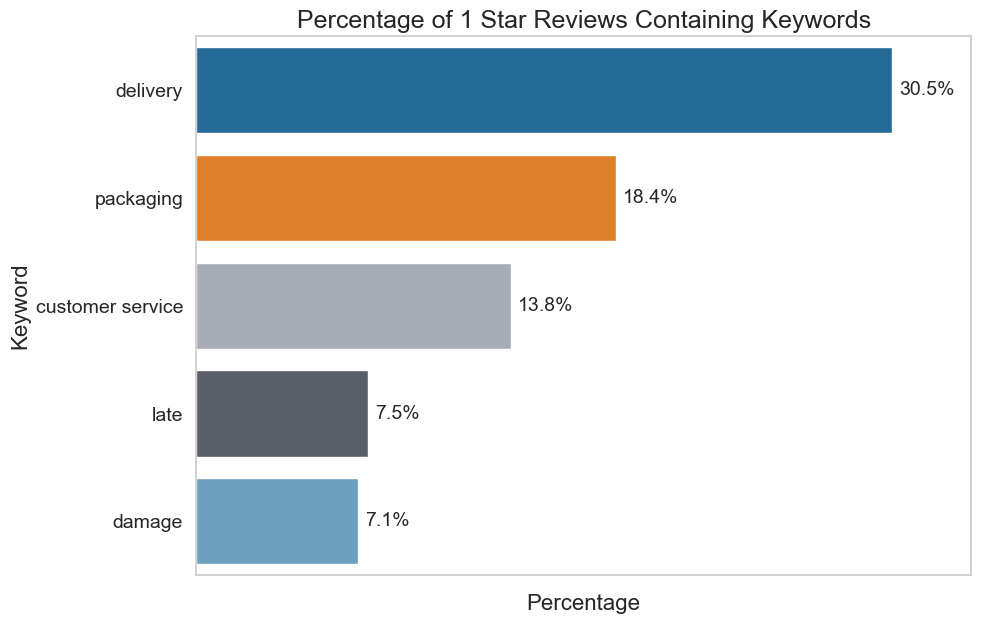

In [109]:
import seaborn as sns

# Define the custom colors for the bars
custom_colors = ["#1170aa", "#fc7d0b", "#a3acb9", "#57606c", "#5fa2ce"]

# Convert the keyword_percentages dictionary to a DataFrame for plotting.
data = {'Keyword': list(keyword_percentages.keys()), 
        'Percentage': list(keyword_percentages.values())}
df_1star = pd.DataFrame(data)

# Sort the DataFrame by the Percentage column in descending order.
df_1star = df_1star.sort_values(by='Percentage', ascending=False)

# Plot the bar chart using Seaborn with custom colors.
plt.figure(figsize=(10, 7))
ax = sns.barplot(x='Percentage', y='Keyword', data=df_1star, palette=custom_colors)

# Remove the gridlines and tick labels on the x-axis.
ax.xaxis.grid(False)
ax.set_xticklabels([])

# Add data labels to the bars with 1 decimal place.
for p in ax.patches:
    percentage = format(p.get_width(), '.1f')
    ax.annotate(percentage + '%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points', fontsize=14)
    
# Set the tick mark labels' font size.
plt.yticks(fontsize=14)

# Add labels and a title.
plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Keyword', fontsize=16)
plt.title('Percentage of 1 Star Reviews Containing Keywords', fontsize=18)

# Set the x-axis limit to go up to 34%.
ax.set_xlim(0, 34)

# View the chart.
plt.show()